In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from function import Eddies_Tools
import numpy as np

from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords


In [3]:
trade_chat = pd.read_csv('data\\trade_chat_v3.csv', index_col=0)
trade_chat

,date,time,text,sentiment,target
0,2/22/2022,8:14:35 AM,how long will downtime be,Other,Patch
1,2/22/2022,8:14:40 AM,8 hours,Other,Patch
2,2/22/2022,8:14:42 AM,few hours,Other,Patch
3,2/22/2022,8:14:42 AM,8 hours?,Negative,Patch
4,2/22/2022,8:14:42 AM,7hrs,Other,Patch
...,...,...,...,...,...
4444,2/23/2022,10:21:11 PM,WTS +15 With my team 2500 io Timed!,Other,Boost
4445,2/23/2022,10:21:45 PM,<Guild Offering> CHEAPEST Mythic/Heroic [Sanc...,Other,Boost
2717,2/23/2022,2:49:47 PM,heroic also so I don't screw up your count,Other,Chat
4447,2/23/2022,10:23:12 PM,wts Strange Goop 250k no need of ah get it ch...,Other,Trade


In [4]:
trade_chat.target.value_counts()

Chat     992
Boost    750
Patch    713
LFM      688
Game     640
Trade    484
LFG      150
Bug       32
Name: target, dtype: int64

In [5]:
trade_chat.sentiment.value_counts()

Other       3883
Negative     566
Name: sentiment, dtype: int64

In [6]:
trade_chat['text'].duplicated().value_counts()

False    2851
True     1598
Name: text, dtype: int64

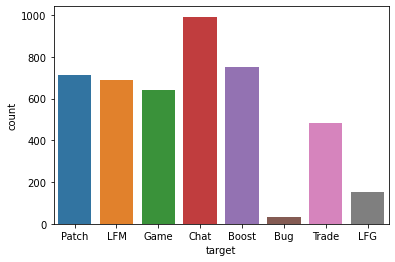

In [7]:
sns.countplot(x='target', data= trade_chat);

In [8]:
trade_chat.drop_duplicates(subset= 'text', inplace=True)
trade_chat.reset_index(drop=True, inplace=True)

<AxesSubplot:xlabel='target', ylabel='count'>

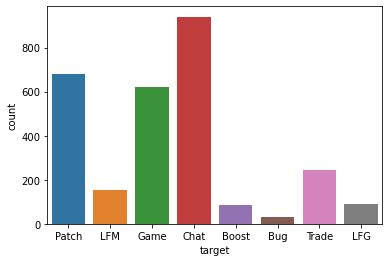

In [9]:
sns.countplot(x='target', data= trade_chat)

In [10]:
patch = trade_chat[trade_chat.target == 'Patch']
chat = trade_chat[trade_chat.target == 'Chat']
game = trade_chat[trade_chat.target == 'Game']

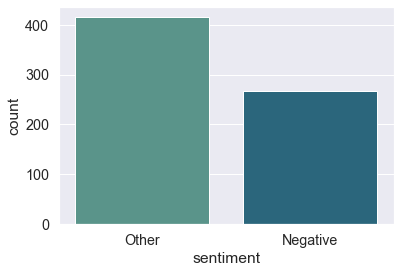

In [49]:
sns.countplot(x='sentiment', data= patch, palette='crest');

In [12]:
patch.sentiment.value_counts()

Other       415
Negative    267
Name: sentiment, dtype: int64

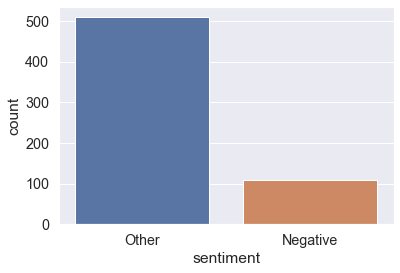

In [50]:
sns.countplot(x='sentiment', data= game);

In [14]:
game.sentiment.value_counts()

Other       509
Negative    110
Name: sentiment, dtype: int64

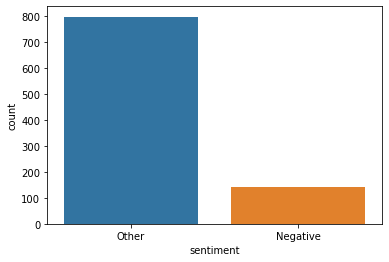

In [15]:
sns.countplot(x='sentiment', data= chat);

In [16]:
chat.sentiment.value_counts()

Other       799
Negative    141
Name: sentiment, dtype: int64

In [17]:
s_words = stopwords.words('english')
tokenizer = RegexpTokenizer(r"(?u)\b([a-z]+|9.2)\w*\b")
et = Eddies_Tools()

In [18]:
s_words.append('u')
s_words.append('ur')
s_words.append('im')
s_words.append('dont')
s_words.append('thats')

In [19]:
tc_tokenized = et.nlp_tokenizer(trade_chat, tokenizer, s_words)
tc_tokenized

,date,time,text,sentiment,target,text_tokenized,joined_tokens
0,2/22/2022,8:14:35 AM,how long will downtime be,Other,Patch,"[long, downtime]",long downtime
1,2/22/2022,8:14:40 AM,8 hours,Other,Patch,[hours],hours
2,2/22/2022,8:14:42 AM,few hours,Other,Patch,[hours],hours
3,2/22/2022,8:14:42 AM,8 hours?,Negative,Patch,[hours],hours
4,2/22/2022,8:14:42 AM,7hrs,Other,Patch,[other],other
...,...,...,...,...,...,...,...
2846,2/23/2022,10:16:11 PM,lfm antorus first 2 last 2 only,Other,Game,"[lfm, antorus, first, last]",lfm antorus first last
2847,2/23/2022,11:15:51 AM,afternoon,Other,Chat,[afternoon],afternoon
2848,2/23/2022,10:21:11 PM,wts +15 with my team 2500 io timed!,Other,Boost,"[wts, team, io, timed]",wts team io timed
2849,2/23/2022,2:49:47 PM,heroic also so i don't screw up your count,Other,Chat,"[heroic, also, screw, count]",heroic also screw count


In [20]:
counter = 0

for i, lists in enumerate(tc_tokenized.text_tokenized):
    if lists == []:
        counter += 1

counter

0

In [21]:
chat_tokenized = tc_tokenized[tc_tokenized.target == 'Chat']
patch_tokenized = tc_tokenized[tc_tokenized.target == 'Patch']
game_tokenized = tc_tokenized[tc_tokenized.target == 'Game']

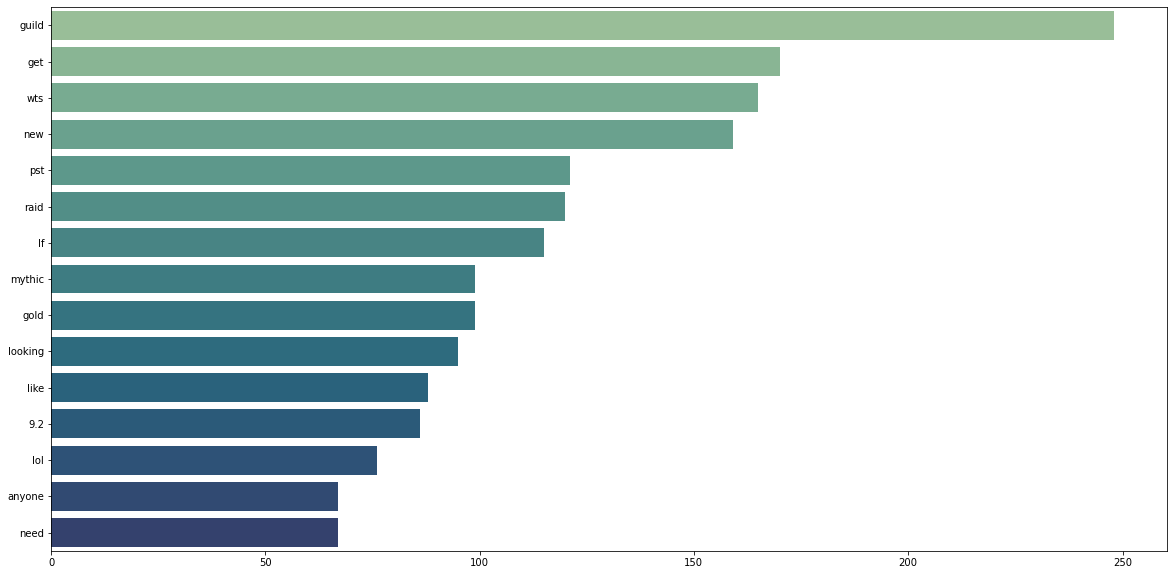

In [22]:
fdist = FreqDist(tc_tokenized.text_tokenized.explode())

top_30_words = list(zip(*fdist.most_common(15)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x= count, y= tokens, palette='crest');

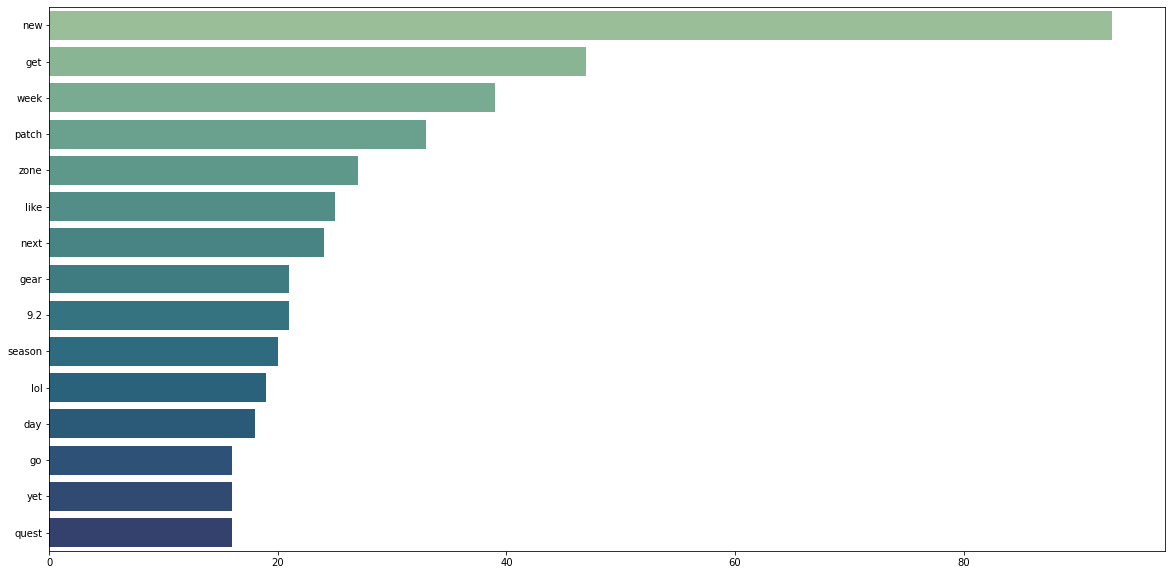

In [34]:
patch_fdist = FreqDist(patch_tokenized.text_tokenized.explode())

top_30_words = list(zip(*patch_fdist.most_common(15)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x= count, y= tokens, palette='crest')


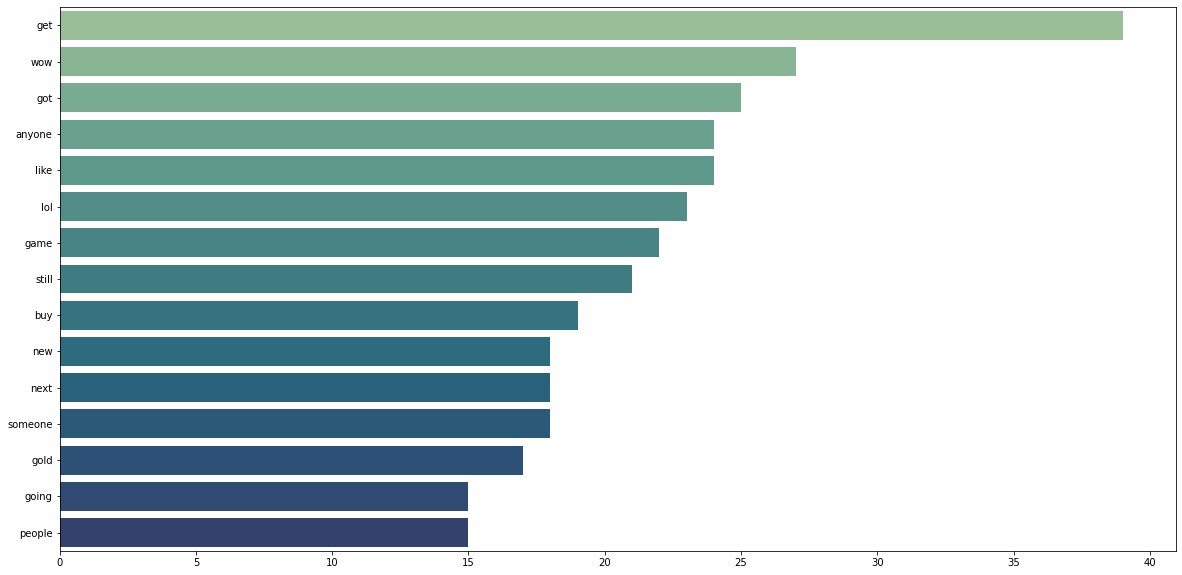

In [24]:
game_fdist = FreqDist(game_tokenized.text_tokenized.explode())

top_30_words = list(zip(*game_fdist.most_common(15)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x= count, y= tokens, palette='crest');

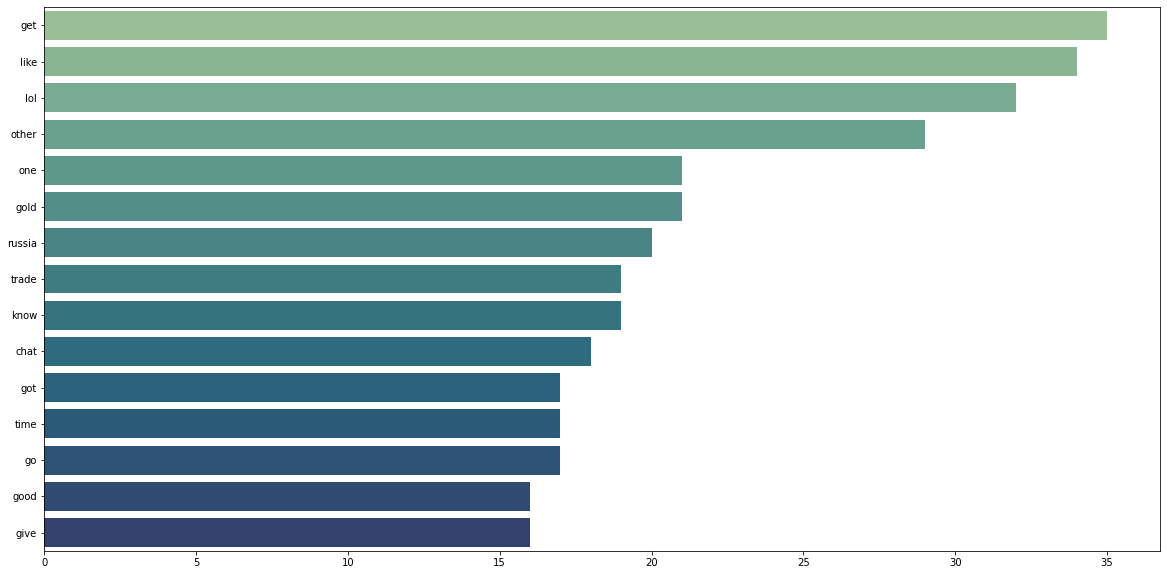

In [25]:
chat_fdist = FreqDist(chat_tokenized.text_tokenized.explode())

top_30_words = list(zip(*chat_fdist.most_common(15)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x= count, y= tokens, palette='crest');

In [26]:
neg_patch = patch_tokenized[patch_tokenized.sentiment == 'Negative']
neg_chat = chat_tokenized[chat_tokenized.sentiment == 'Negative']
neg_game = game_tokenized[game_tokenized.sentiment == 'Negative']
other_patch = patch_tokenized[patch_tokenized.sentiment == 'Other']
other_chat = chat_tokenized[chat_tokenized.sentiment == 'Other']
other_game = game_tokenized[game_tokenized.sentiment == 'Other']

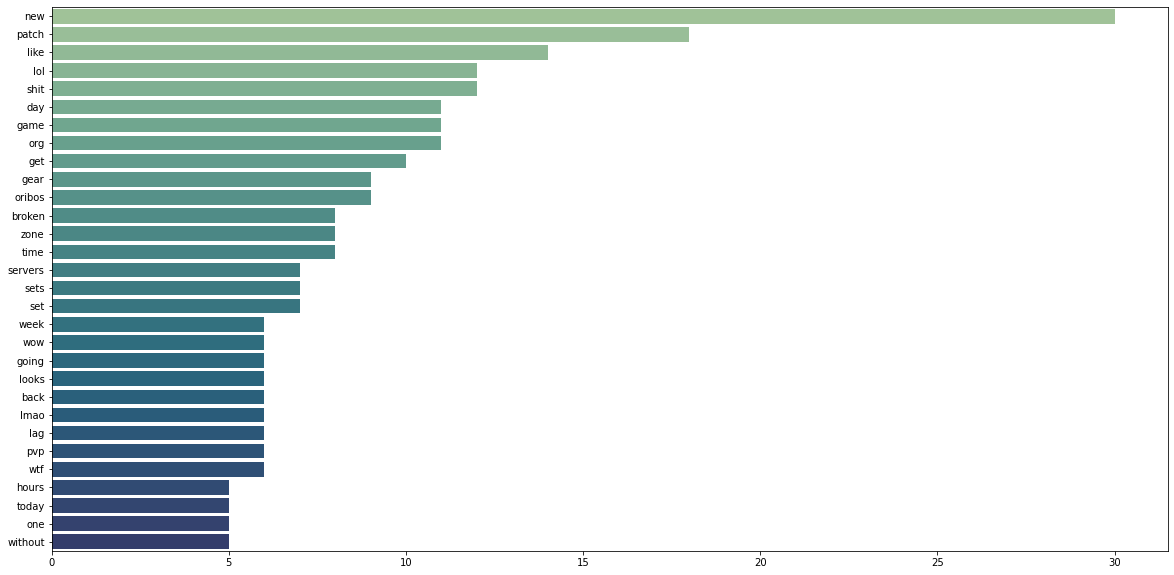

In [27]:
neg_patch_fdist = FreqDist(neg_patch.text_tokenized.explode())

top_30_words = list(zip(*neg_patch_fdist.most_common(30)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x= count, y= tokens, palette='crest');

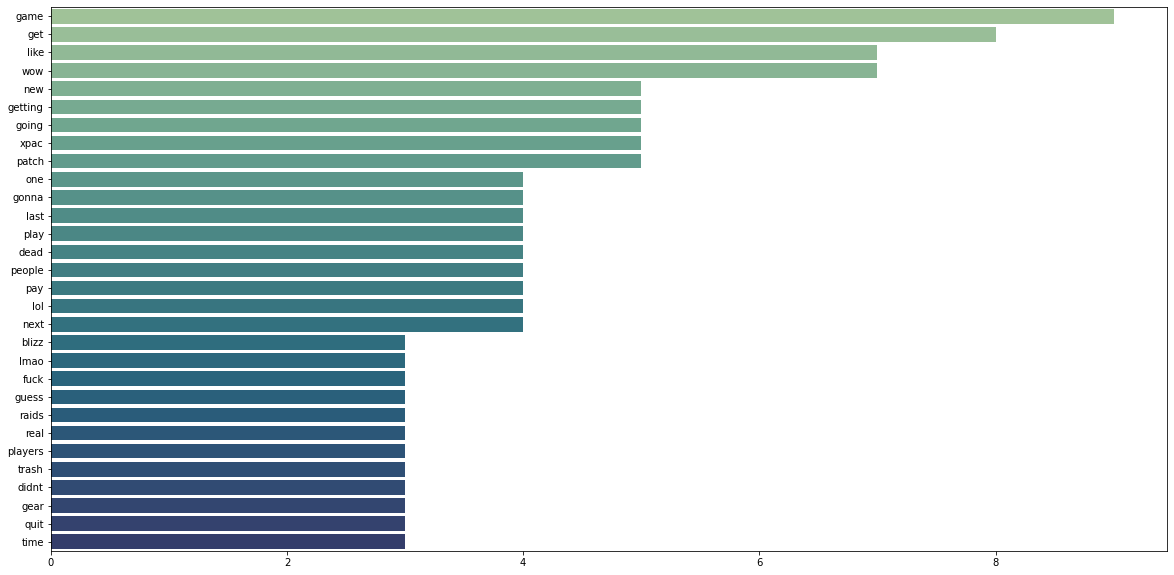

In [33]:
neg_game_fdist = FreqDist(neg_game.text_tokenized.explode())

top_30_words = list(zip(*neg_game_fdist.most_common(30)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x= count, y= tokens, palette='crest');

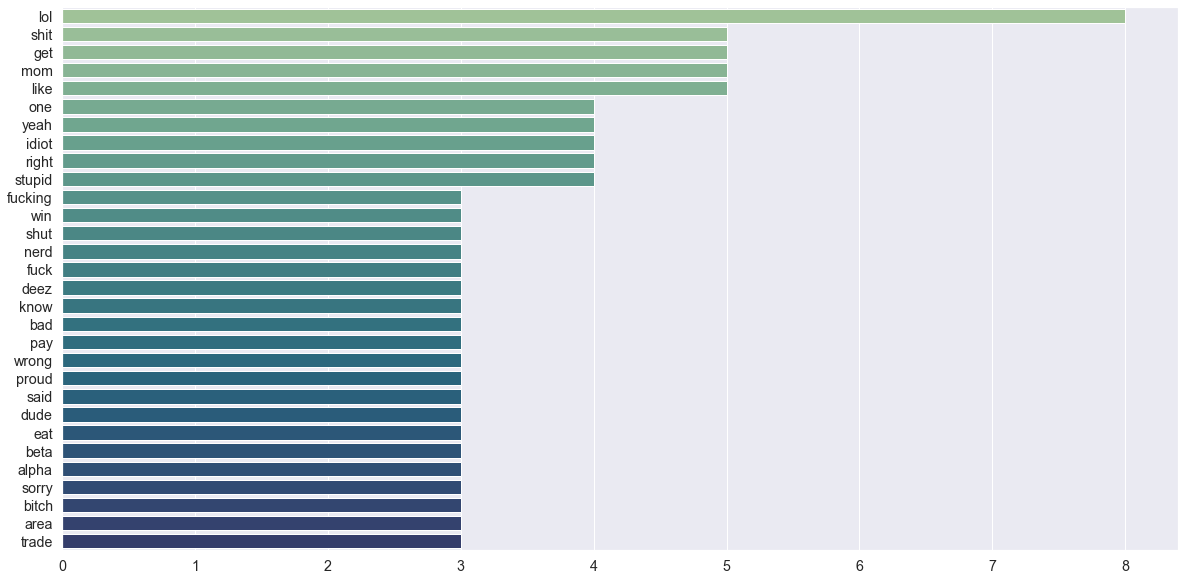

In [62]:
neg_chat_fdist = FreqDist(neg_chat.text_tokenized.explode())

top_30_words = list(zip(*neg_chat_fdist.most_common(30)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x= count, y= tokens, palette='crest');

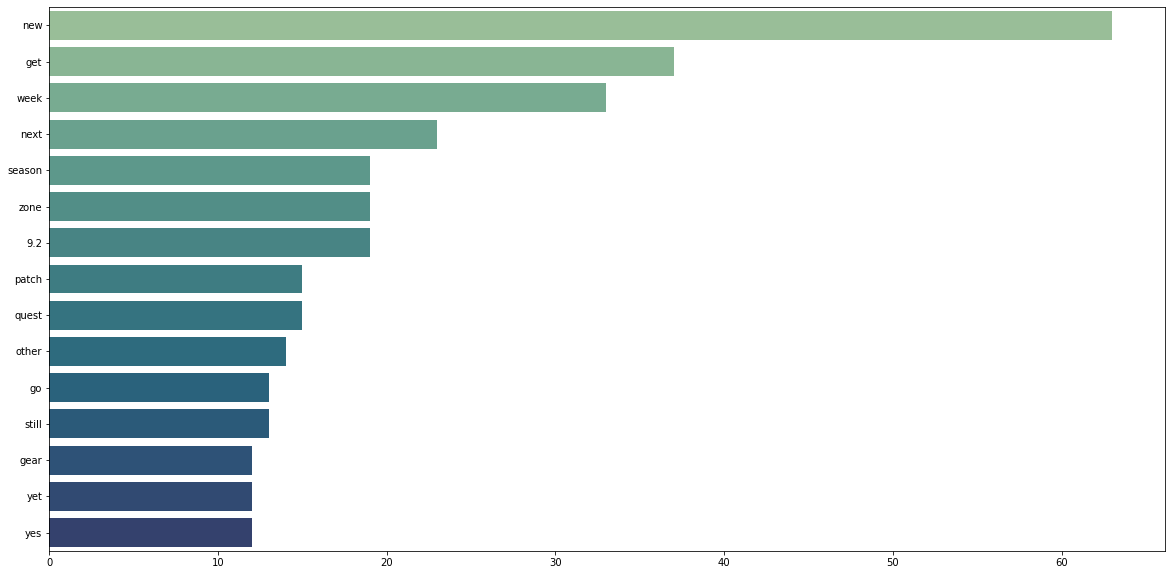

In [30]:
other_patch_fdist = FreqDist(other_patch.text_tokenized.explode())

top_30_words = list(zip(*other_patch_fdist.most_common(15)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x= count, y= tokens, palette='crest');

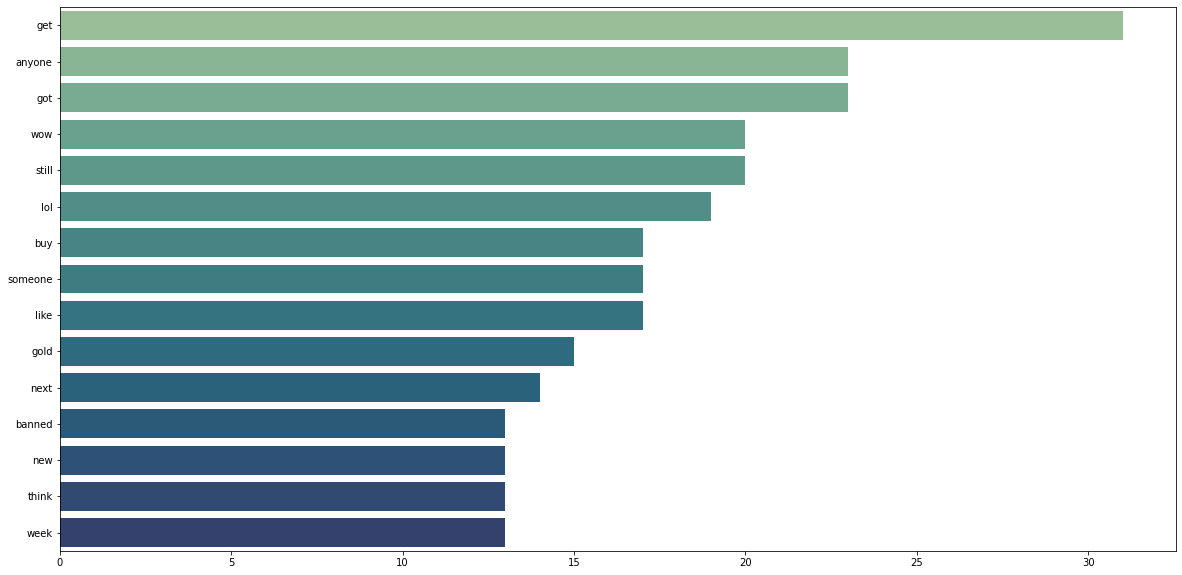

In [31]:
other_game_fdist = FreqDist(other_game.text_tokenized.explode())

top_30_words = list(zip(*other_game_fdist.most_common(15)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(x= count, y= tokens, palette='crest');

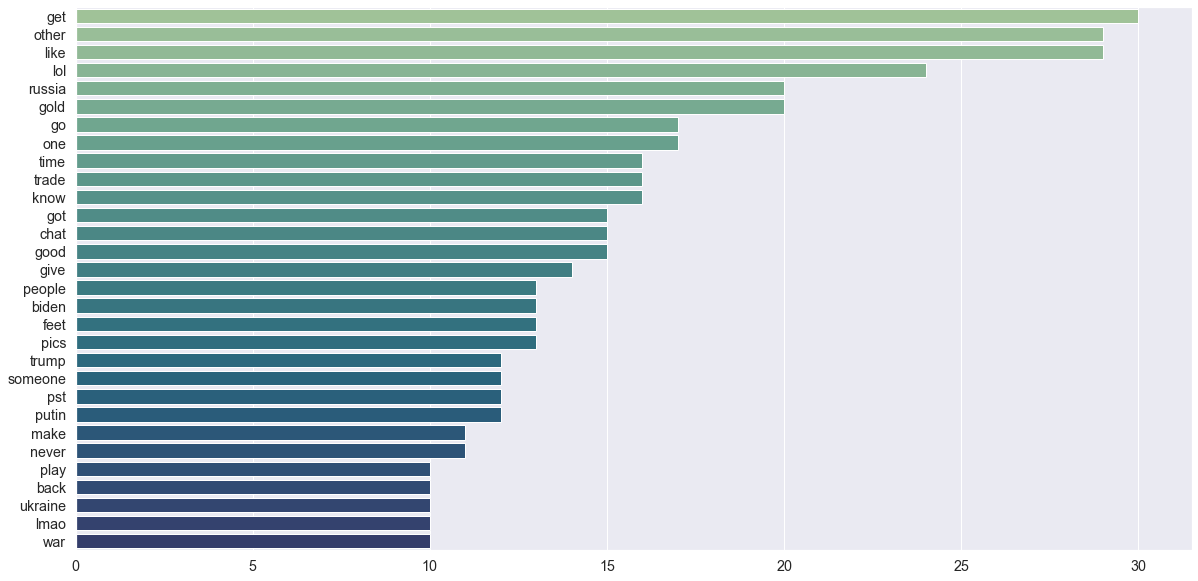

In [63]:
other_chat_fdist = FreqDist(other_chat.text_tokenized.explode())

top_30_words = list(zip(*other_chat_fdist.most_common(30)))

tokens = np.array(top_30_words[0])
count = np.array(top_30_words[1])

fig, ax = plt.subplots(figsize=(20,10))

top_30_chart = sns.barplot(x= count, y= tokens, palette='crest')